In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

file_path = r"C:\Users\samvi\OneDrive\Desktop\samvidhaa\movie_data\movies.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the shape of the DataFrame
print("Shape of the DataFrame movies:", df.shape)


Shape of the DataFrame movies: (9742, 3)


In [3]:

file_path2 = r"C:\Users\samvi\OneDrive\Desktop\samvidhaa\movie_data\ratings.csv"

# Load the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Display the shape of the DataFrame
print("Shape of the DataFrame ratings:", df.shape)

Shape of the DataFrame ratings: (9742, 3)


In [4]:
unique_user_ids = df2['userId'].nunique()


print("Number of unique userId values:", unique_user_ids)

Number of unique userId values: 610


In [5]:
# Merge the ratings and movies DataFrames on the 'movieId' column
merged_df = pd.merge(df2, df, on='movieId')

# Group by movie title and count the number of ratings for each movie
ratings_count = merged_df.groupby('title')['rating'].count()

# Find the movie with the maximum number of ratings
max_ratings_movie = ratings_count.idxmax()

# Print the result
print("Movie with the maximum number of ratings:", max_ratings_movie)

Movie with the maximum number of ratings: Forrest Gump (1994)


In [6]:
# Filter rows for the movie "Terminator 2: Judgment Day (1991)"
movie_title = "Terminator 2: Judgment Day (1991)"
movie_ratings = merged_df[merged_df['title'] == movie_title]['rating']

# Calculate the average user rating for the movie
average_rating = movie_ratings.mean()

# Print the result
print(f"Average user rating for '{movie_title}': {average_rating:.2f}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


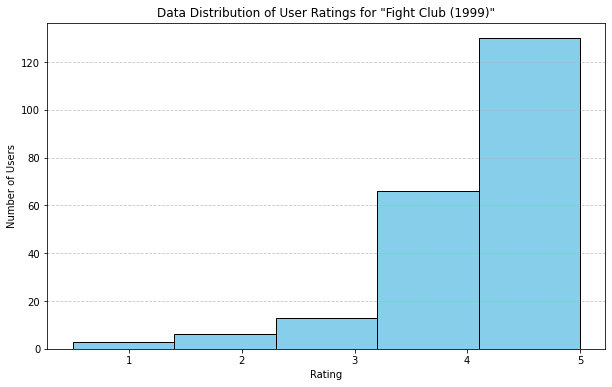

In [7]:
# Filter rows for the movie "Fight Club (1999)"
movie_title = "Fight Club (1999)"
movie_ratings = merged_df[merged_df['title'] == movie_title]['rating']

# Plot the data distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings, bins=5, edgecolor='black', color='skyblue')
plt.title(f'Data Distribution of User Ratings for "{movie_title}"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = df2.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename the columns for clarity
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Step 2: Inner join with movies DataFrame
merged_df = pd.merge(grouped_ratings, df, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Display the resulting DataFrame
print(filtered_movies)

      movieId  rating_count  rating_mean                             title  \
0           1           215     3.920930                  Toy Story (1995)   
1           2           110     3.431818                    Jumanji (1995)   
2           3            52     3.259615           Grumpier Old Men (1995)   
5           6           102     3.946078                       Heat (1995)   
6           7            54     3.185185                    Sabrina (1995)   
...       ...           ...          ...                               ...   
8287   106782            54     3.916667   Wolf of Wall Street, The (2013)   
8354   109374            52     3.778846  Grand Budapest Hotel, The (2014)   
8358   109487            73     3.993151               Interstellar (2014)   
8457   112852            59     4.050847    Guardians of the Galaxy (2014)   
8673   122904            54     3.833333                   Deadpool (2016)   

                                           genres  
0     Adven

In [9]:
# Find the movie with the highest average rating
most_popular_movie = filtered_movies.loc[filtered_movies['rating_mean'].idxmax()]

# Display the result
print("Most popular movie based on average user ratings:")
print("Title:", most_popular_movie['title'])
print("Average Rating:", most_popular_movie['rating_mean'])
print("Number of Ratings:", most_popular_movie['rating_count'])

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.429022082018927
Number of Ratings: 317


In [10]:
# Sort the DataFrame by rating_count in descending order
top_movies_by_ratings = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 popular movies based on the number of user ratings
print("Top 5 popular movies based on number of user ratings:")
print(top_movies_by_ratings[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [11]:
# Filter only Sci-Fi movies
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Sort the Sci-Fi movies DataFrame by rating_count in descending order
top_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Find the title of the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = top_sci_fi_movies.iloc[2]['title']

# Display the result
print("Third most popular Sci-Fi movie based on number of user ratings:", third_most_popular_sci_fi_movie)

Third most popular Sci-Fi movie based on number of user ratings: Jurassic Park (1993)


In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    
    # Set up the request headers
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    # Send the request and get the response
    response = requests.get(URL, headers=request_header)
    
    # Create a BeautifulSoup object to parse the HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the IMDb rating on the page
    imdb_rating = soup.find('span', attrs={'data-testid': 'hero-rating-bar__aggregate-rating__score'})
    
    return imdb_rating.text if imdb_rating else np.nan


In [ ]:

file_path3 = r"C:\Users\samvi\OneDrive\Desktop\samvidhaa\movie_data\links.csv"

# Load the CSV file into a DataFrame
df_links = pd.read_csv(file_path3)


In [ ]:
# Apply the scrapper function to get IMDb ratings for each movie in the DataFrame
filtered_movies['imdb_rating'] = filtered_movies['movieId'].apply(scrapper)

# Find the movieId with the highest IMDb rating
highest_rated_movieId = filtered_movies.loc[filtered_movies['imdb_rating'].idxmax()]['movieId']

print("MovieId of the movie with the highest IMDb rating:", highest_rated_movieId)
